# Basic DeepField

This notebook briefly describes the representation of reservoir models within the `DeepField` framework.

At the top level all the data about the reservoir model are contained and manipulated by the `Field` class. To be more detailed, let's import `Field` and load some model. We will use the open-source [Egg]() model available in the  `DeepField` repository.

Required imports:

In [1]:
import sys
sys.path.append('..')
from deepfield import Field

We now specify the path to the main reservoir model file, which has the extension `.DATA`. The method `load` executes data loading. The logger indicates current steps of the process:

In [2]:
model = Field('../open_data/egg/Egg_Model_ECL.DATA').load()

INFO:Field:Using default config.
INFO:Field:Start reading ..\open_data\egg\RESULTS\Egg_Model_ECL\Egg_Model_ECL.EGRID
INFO:Field:Decoding GRIDHEAD.
INFO:Field:Decoding COORD.
INFO:Field:Decoding ZCORN.
INFO:Field:Decoding ACTNUM.
...
INFO:Field:Decoding PARAMS at timestep 119.
INFO:Field:Decoding PARAMS at timestep 120.
INFO:Field:Finish reading ..\open_data\egg\RESULTS\Egg_Model_ECL\Egg_Model_ECL.UNSMRY
INFO:Field:Start reading ..\open_data\egg\RESULTS\Egg_Model_ECL\Egg_Model_ECL.SMSPEC
INFO:Field:Decoding KEYWORDS.
INFO:Field:Decoding WGNAMES.
INFO:Field:Finish reading ..\open_data\egg\RESULTS\Egg_Model_ECL\Egg_Model_ECL.SMSPEC
INFO:Field:===== Field summary =====
INFO:Field:GRID attributes: MAPAXES, DIMENS, ZCORN, COORD, ACTNUM, DX, DY, DZ, TOPS
INFO:Field:ROCK attributes: PORO, PERMX, PERMY, PERMZ, NTG
INFO:Field:STATES attributes: PRESSURE, SOIL, SWAT
INFO:Field:TABLES attributes: DENSITY, PVCDO, PVTW, ROCK, SWOF
INFO:Field:WELLS attributes: WCONINJE, WCONPROD, COMPDAT, RESULTS, WE

Reading the log, you can note that loading data includes a number of actions, such as an arithmetic operation defined in the `.DATA` file. This is shown in more detail in the tutorial [Arithmetics]().

Before diving into the model, one can visualize the model using the built-in interactive 3D viewer. For example, to visualize the x-permeability, use
```python
model.show(attr='PERMX')
```
This creates a separate interactive window that allows zooming in and out and rotating the reservoir model. Move the opacity slider to make data more or less transparent. Below we demonstrate the static screenshot that can be reproduced. 

<p>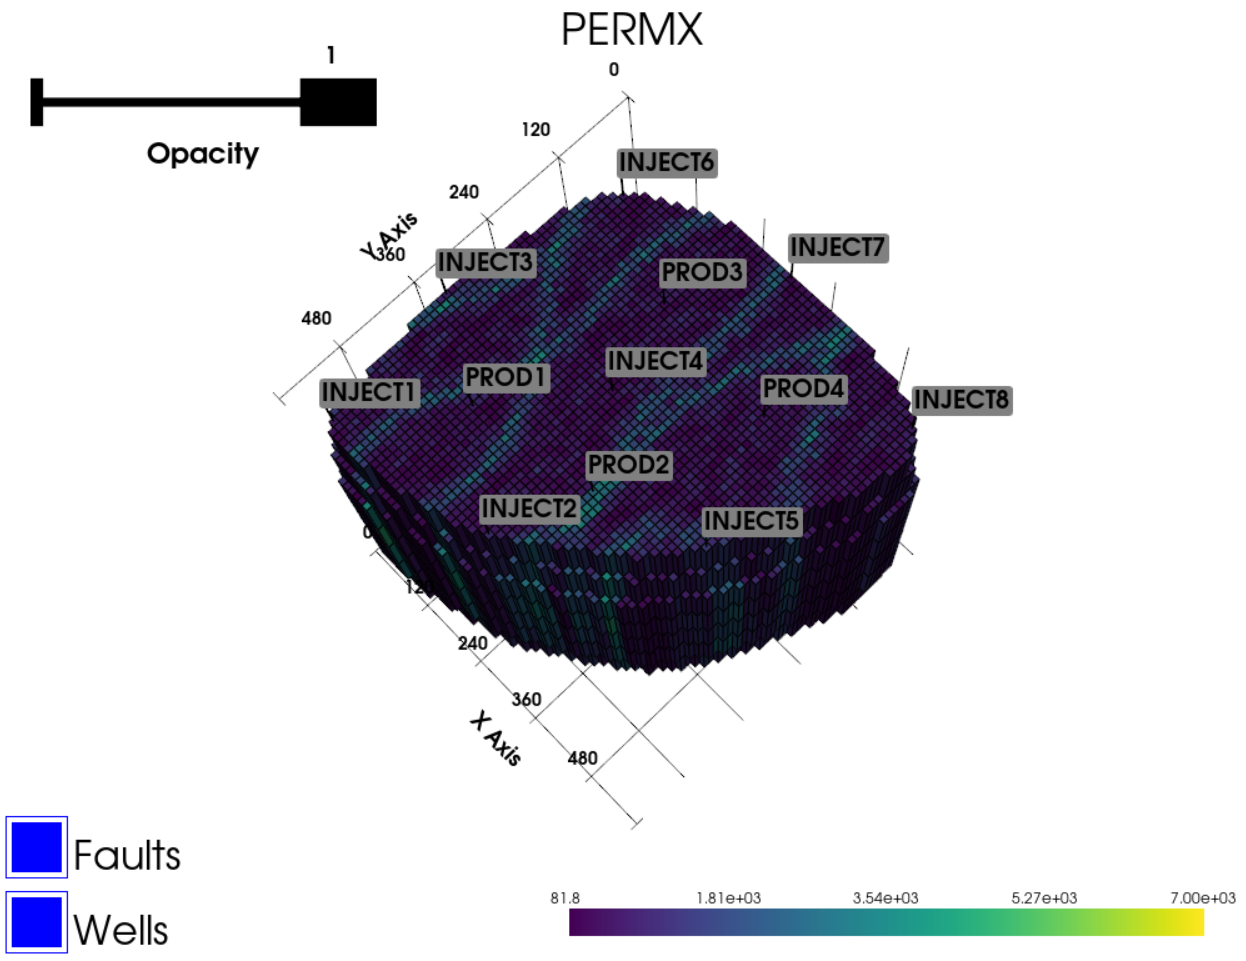</p>

The method `show` contains a number of advanced visualization options (see the [documentation]() for parameters of `show`) and we will discuss them in the tutorial [Visualization]().

Now we dive under the hood of the `Field` class. It contains several components that represent the reservoir model:

In [3]:
model.components

('grid', 'rock', 'states', 'tables', 'wells', 'faults', 'aquifers')

Each component is a separate class instance that contains data and knows how to manipulate with the data. Data are stored under certain attribute names. Note that the list of attributes is model dependent (it depends of what `.DATA` file includes). For example, the Grid we loaded before contains the following attributes: 

In [4]:
model.grid.attributes

('MAPAXES', 'DIMENS', 'ZCORN', 'COORD', 'ACTNUM', 'DX', 'DY', 'DZ', 'TOPS')

Each attribute contains some data, for example, `DIMENS` contains the grid sizes

In [5]:
model.grid.dimens

array([60, 60,  7])

For convenience, attributes are case-insensitive:

In [6]:
model.grid.DIMENS

array([60, 60,  7])

Read more about grid structure in the tutorial [Grid]().

The `rock` and `states` component contain static and dynamic grid-cell properties. For example, the `PERMX` array is stored in the `rock` component:

In [7]:
type(model.rock.permx), model.rock.permx.shape

(numpy.ndarray, (60, 60, 7))

We provide the `Egg` model with simulation results, so that the `states` contains simulated fluid dynamics:

In [8]:
model.states.attributes

('PRESSURE', 'SOIL', 'SWAT')

In [9]:
type(model.states.soil), model.states.soil.shape

(numpy.ndarray, (121, 60, 60, 7))

More details about `rock` and `states` are in the separate [tutorial]().

The  `wells` components is special. It has a tree structure following the natural ordering of wells. The `render_tree` method shows the ordering of wells and well groups:

In [10]:
model.wells.render_tree()

FIELD
+-- 1
    |-- INJECT1
    |-- INJECT2
    |-- INJECT3
    |-- INJECT4
    |-- INJECT5
    |-- INJECT6
    |-- INJECT7
    |-- INJECT8
    |-- PROD1
    |-- PROD2
    |-- PROD3
    +-- PROD4


Each node can be accessed by its name, for example:

In [11]:
model.wells['PROD1']

Each node has a number of attributes:

In [12]:
model.wells['PROD1'].attributes

('WELSPECS', 'COMPDAT', 'WCONPROD', 'RESULTS', 'WELLTRACK')

and attributes contain data (usually, pandas DataFrames or numpy arrays):

In [13]:
model.wells['PROD1'].compdat

,DATE,WELL,I,J,K1,K2,MODE,Sat,CF,DIAM,KH,SKIN,ND,DIR,Ro
0,2011-06-15,PROD1,16,43,1,7,OPEN,NaN,NaN,0.2,NaN,0.0,NaN,Z,NaN


Read more about wells in the tutorial [Wells]().

One more component that is somehow special is `Table`. It contains rock and fluid properties:

In [14]:
model.tables.attributes

('DENSITY', 'PVCDO', 'PVTW', 'ROCK', 'SWOF')

Data in each attributes are stored in a pandas DataFrame, for example

In [15]:
model.tables.SWOF

,KRWO,KROW,POW
SW,,,
0.10,0.000000,0.800000,0.0
0.20,0.000000,0.800000,0.0
0.25,0.000273,0.580820,0.0
0.30,0.002185,0.410100,0.0
0.35,0.007374,0.280100,0.0
0.40,0.017478,0.183780,0.0
0.45,0.034138,0.114730,0.0
0.50,0.058990,0.067253,0.0
0.55,0.093673,0.036301,0.0


Tables can be visualized:

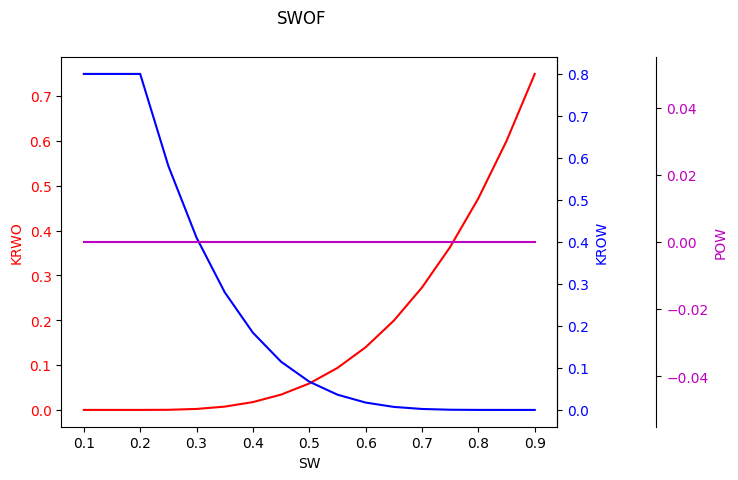

In [16]:
model.tables.SWOF.plot()

The key feature of the tables is that one can query interpoleted values at any point or set of point:

In [17]:
model.tables.SWOF([0.15, 0.63])

array([[0.        , 0.8       , 0.        ],
       [0.175386  , 0.01130476, 0.        ]])

Read more about tables in the tutorial [Tables]().

If you modified the reservoir model, you can save changes in a new model using two options:
* save data in the ECLIPSE/t-Navigator compatible format;
* save data in the HDF5 file format.

The benefit of the HDF5 format is much faster data loading compared to reading data from the ECLIPSE format.

To save the model in ECLIPSE format, indicate the directory where to place model files:

In [18]:
model.dump(path='./')

This will result in a new Egg_Model folder containing the Egg_Model.data file and several additional files. The model can be loaded again as usual:
```python
model_restored = Field(path='./Egg_Model/Egg_Model.data').load()
```

To save the model in HDF5 file, indicate where to create a new file:

In [19]:
model.dump(path='./egg.hdf5')

Now you can note that reading data from HDF5 file is significantly faster

In [20]:
%%time
model_restored = Field(path='./egg.hdf5').load()

INFO:Field:===== Field summary =====
INFO:Field:AQUIFERS attributes: 
INFO:Field:FAULTS attributes: 
INFO:Field:GRID attributes: MAPAXES, TOPS, ACTNUM, COORD, DIMENS, DX, DY, DZ, ZCORN
INFO:Field:ROCK attributes: NTG, PERMX, PERMY, PERMZ, PORO
INFO:Field:STATES attributes: PRESSURE, SOIL, SWAT
INFO:Field:TABLES attributes: DENSITY, PVCDO, PVTW, ROCK, SWOF
INFO:Field:WELLS attributes: WCONINJE, WCONPROD, COMPDAT, RESULTS, WELSPECS, WELLTRACK
INFO:Field:=========================
CPU times: total: 656 ms
Wall time: 669 ms


The restored model is exactly similar to the model we loaded from `.DATA` file:

In [21]:
model_restored.components

('aquifers', 'faults', 'grid', 'rock', 'states', 'tables', 'wells')

Done! Read the next tutorials for more details about model components.